# Gold Price Prediction
### Data Preprocessing

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'Gold Price Prediction.csv'
data = pd.read_csv(file_path)

# Data Preprocessing

# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Drop rows with missing target values (Price Tomorrow)
data_clean = data.dropna(subset=['Price Tomorrow'])

# Handle remaining missing values by forward-filling
data_clean.fillna(method='ffill', inplace=True)

/tmp/ipykernel_104211/1417853290.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])
/tmp/ipykernel_104211/1417853290.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.fillna(method='ffill', inplace=True)


### Train Test Split

In [19]:
# Define the features (X) and the target (y)
X = data_clean.drop(columns=['Date', 'Price Tomorrow'])
y = data_clean['Price Tomorrow']

# Impute missing values with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the imputed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

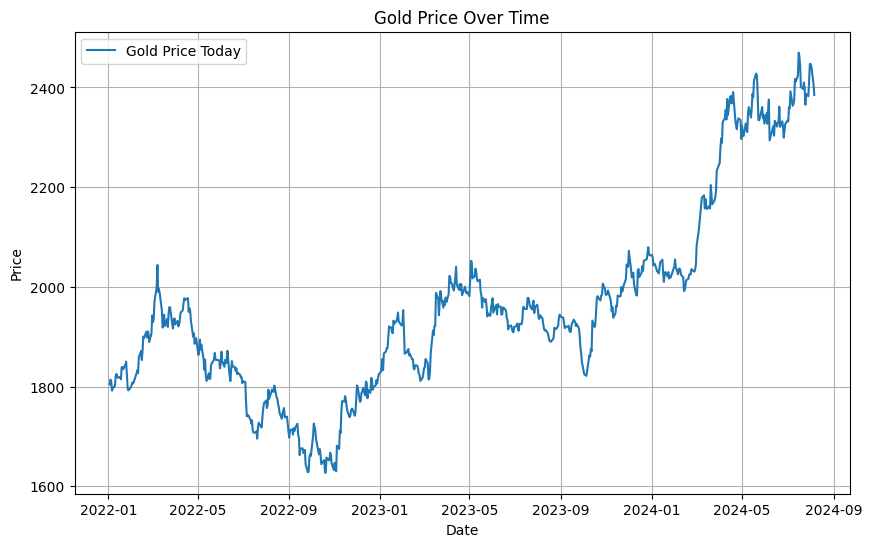

In [20]:
# Plot the gold price over time
plt.figure(figsize=(10, 6))
plt.plot(data_clean['Date'], data_clean['Price Today'], label='Gold Price Today')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

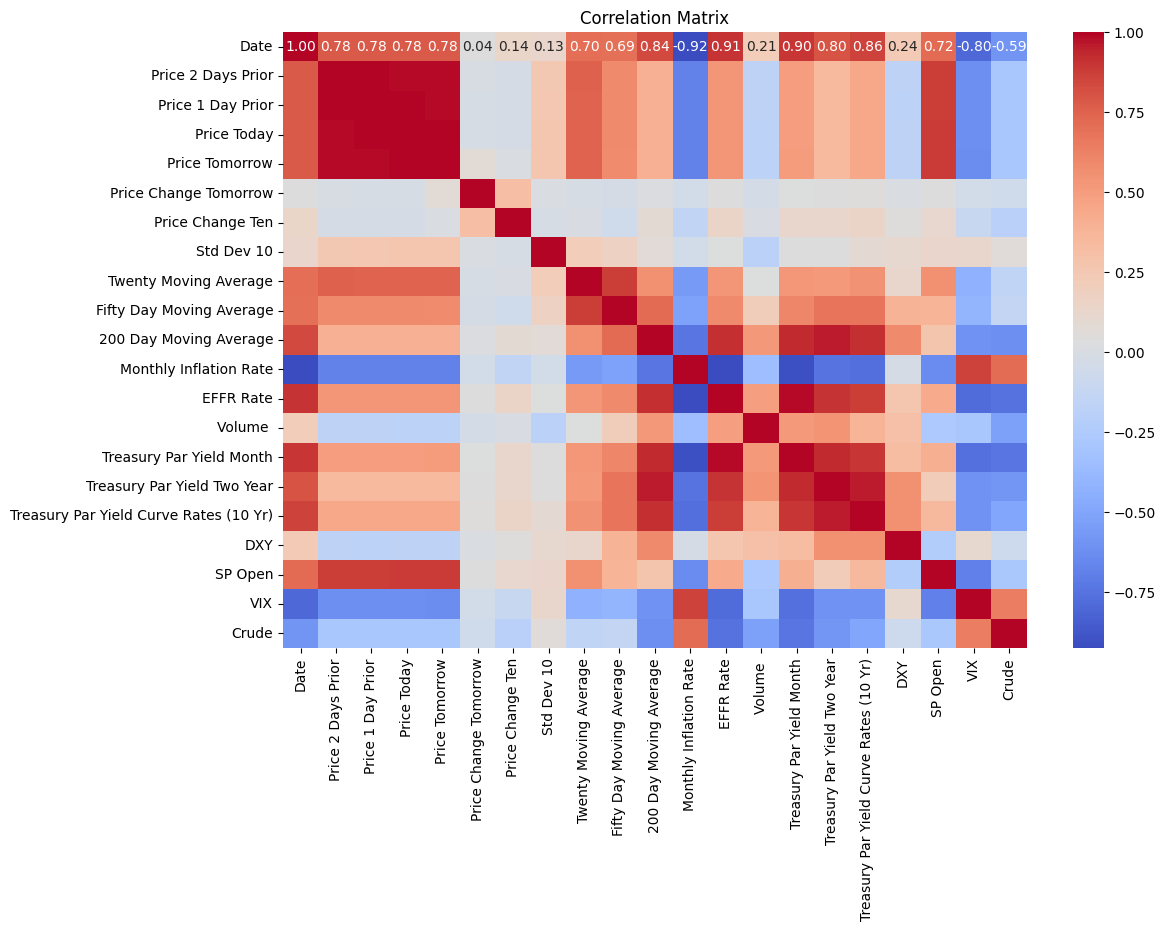

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_clean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Prediction

In [22]:
# Train a Random Forest model for prediction
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the Mean Absolute Error
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 8.487179259259312
Mean Squared Error: 172.1552084773367
R^2 Score: 0.9959469799841132


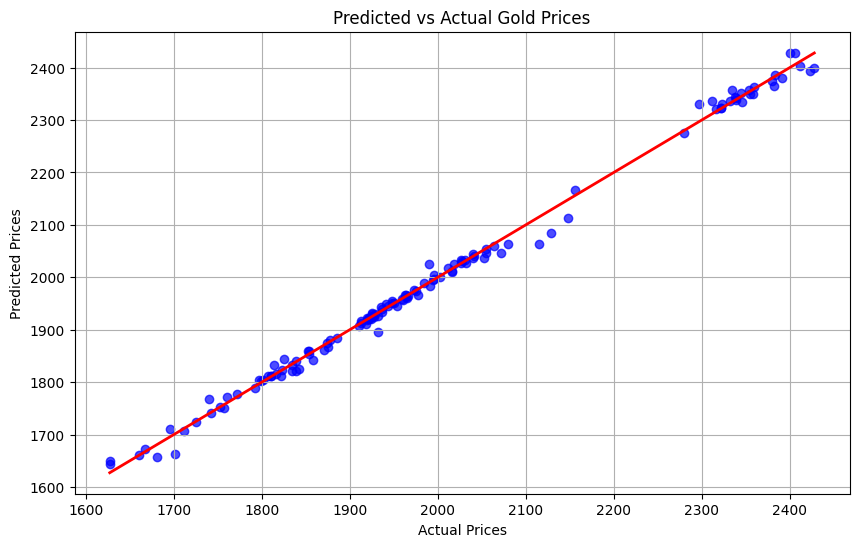

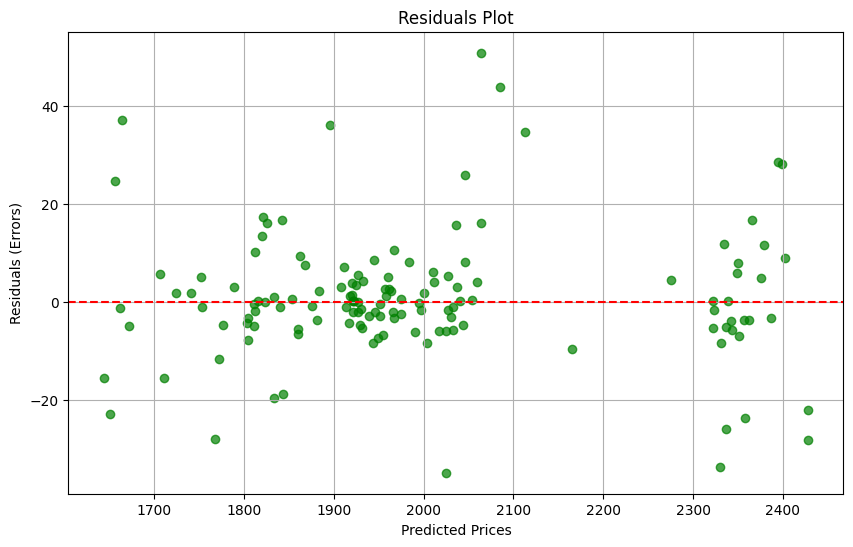

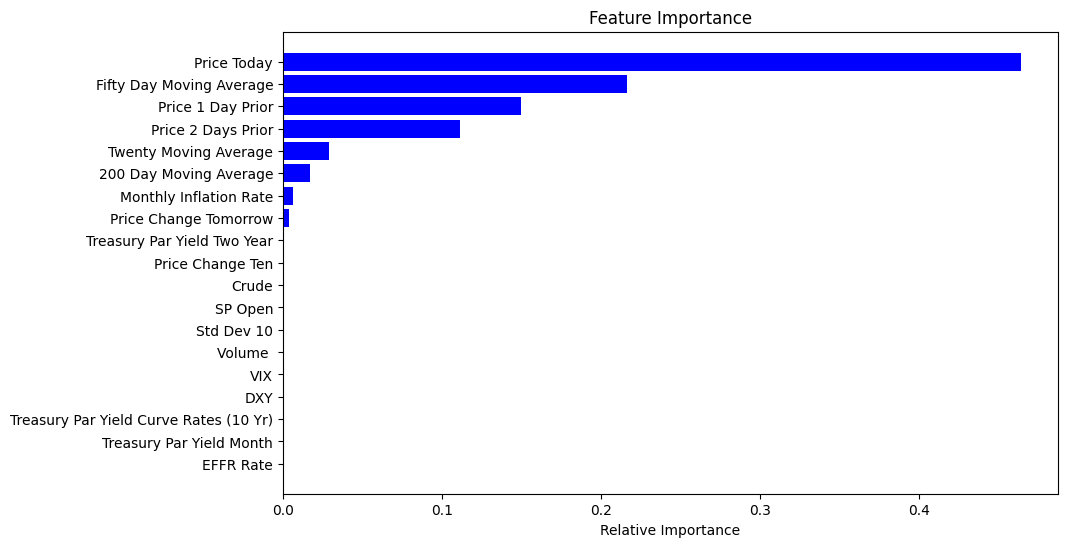

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Visualizing Model Accuracy

# Plot Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', lw=2)  # Line for perfect prediction
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Gold Prices')
plt.grid(True)
plt.show()

# Plot residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='g')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# 2. Feature Importance

# Get feature importances from the Random Forest model
importances = model.feature_importances_
feature_names = X.columns

# Sort the feature importance values
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Conclusion
Mean Absolute Error (MAE): 8.49 indicates that, on average, the model's predicted gold prices are off by approximately 8.49 units. For gold prices, this could be considered quite accurate, especially if the prices are in the range of hundreds or thousands.

Mean Squared Error (MSE): 172.16 suggests that the model's squared error is low, which further emphasizes that the model is performing well, though MSE tends to penalize larger errors more heavily.

R² Score: 0.996 shows that the model explains 99.6% of the variance in the data, meaning it is a very strong predictor of the gold price, and the remaining 0.4% is due to unexplained variance.